In [10]:
import pandas as pd
import numpy as np

## Responses

1. Are there any missing values?

In [11]:

# Import https://raw.githubusercontent.com/CUNY-CISC-3225/datasets/main/
bikes = pd.read_csv("https://raw.githubusercontent.com/CUNY-CISC-3225/datasets/main/bike_rentals.csv", sep=";")
bikes.head()

,year,hour,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count
0,2012,23,summer,no,0,moderate,23.78,27.275,73,11.0014,133
1,2011,8,summer,no,0,good,27.88,31.820,57,0.0000,132
2,2012,2,winter,no,1,good,20.50,24.240,59,0.0000,19
3,2011,20,summer,no,1,bad,25.42,28.790,83,19.9995,58
4,2011,17,summer,no,1,bad,26.24,28.790,89,0.0000,285


In [12]:
# 1. Are there any missing values?
bikes.isnull().sum()

year          0
hour          0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
count         0
dtype: int64

In [13]:
# 2. Regardless of your answer above, would missing values be a problem for clustering? Why or why not?

# Missing values would be a problem for clustering because when it comes to categorizing and creating the different clusters, the missing values would impact on the mean calculations of the clusters. Incorrectly assigning data points.

In [14]:
# 3. Which columns contain continuous values? For these columns, use describe() to show basic summary statistics about them.

# year, hour, temp, atemp, humidity, windspeed, count. 
# NOTE workingday is categorical.

bikes[['year', 'hour', 'temp', 'atemp', 'humidity', 'windspeed', 'count']].describe()

,year,hour,temp,atemp,humidity,windspeed,count
count,7689.000000,7689.000000,7689.000000,7689.000000,7689.000000,7689.000000,7689.000000
mean,2011.495513,11.565353,20.267085,23.696581,61.771492,12.802070,191.419430
std,0.500012,6.915777,7.824066,8.514199,19.302151,8.178889,182.140265
min,2011.000000,0.000000,0.820000,0.760000,0.000000,0.000000,1.000000
25%,2011.000000,6.000000,13.940000,16.665000,46.000000,7.001500,41.000000
50%,2011.000000,12.000000,20.500000,24.240000,62.000000,12.998000,145.000000
75%,2012.000000,18.000000,26.240000,31.060000,77.000000,16.997900,283.000000
max,2012.000000,23.000000,41.000000,45.455000,100.000000,56.996900,977.000000


In [15]:
# 4. Which columns contain categorical values? Use value counts() to show the unique values contained in each column, and how often they appear.

# season, holiday workingday, weather

categorical = ['season', 'holiday', 'workingday', 'weather']
for cat in categorical:
    print(bikes[cat].value_counts())

summer    1943
autumn    1925
spring    1920
winter    1901
Name: season, dtype: int64
no     7466
yes     223
Name: holiday, dtype: int64
1    5208
0    2481
Name: workingday, dtype: int64
good        5122
moderate    1981
bad          586
Name: weather, dtype: int64


In [16]:
# 5. Of the categorical columns, which contain binary yes/no values? What do the yes/no values mean?

# holiday (yes: True, no: False) and workingday (0: False/1: True).




In [17]:
# ### 2 Preprocessing (6 points)
# Perform any steps necessary to preprocess the dataset to prepare it for clustering. This could include one-hot
# encoding, producing binary 0/1 values, or standardizing with Z-score normalization.

# 1. Hot encode all categorical except for workingday. (which is already encoded)
bikes_enc = pd.get_dummies(bikes, columns=['season', 'weather', 'holiday'])
bikes_enc.head()


,year,hour,workingday,temp,atemp,humidity,windspeed,count,season_autumn,season_spring,season_summer,season_winter,weather_bad,weather_good,weather_moderate,holiday_no,holiday_yes
0,2012,23,0,23.78,27.275,73,11.0014,133,0,0,1,0,0,0,1,1,0
1,2011,8,0,27.88,31.820,57,0.0000,132,0,0,1,0,0,1,0,1,0
2,2012,2,1,20.50,24.240,59,0.0000,19,0,0,0,1,0,1,0,1,0
3,2011,20,1,25.42,28.790,83,19.9995,58,0,0,1,0,1,0,0,1,0
4,2011,17,1,26.24,28.790,89,0.0000,285,0,0,1,0,1,0,0,1,0


In [19]:
# #### 3 K=2 (8 points)
# Perform k-means clustering on the dataset with k=2.

from sklearn.cluster import KMeans

# 1. Create a new DataFrame with the same index as the original dataset, but with a single column that contains the cluster label for each row.
kmeans = KMeans(n_clusters=2, random_state=0).fit(bikes_enc)
bikes_enc['cluster'] = kmeans.labels_
bikes_enc.head()


,year,hour,workingday,temp,atemp,humidity,windspeed,count,season_autumn,season_spring,season_summer,season_winter,weather_bad,weather_good,weather_moderate,holiday_no,holiday_yes,cluster
0,2012,23,0,23.78,27.275,73,11.0014,133,0,0,1,0,0,0,1,1,0,1
1,2011,8,0,27.88,31.820,57,0.0000,132,0,0,1,0,0,1,0,1,0,1
2,2012,2,1,20.50,24.240,59,0.0000,19,0,0,0,1,0,1,0,1,0,1
3,2011,20,1,25.42,28.790,83,19.9995,58,0,0,1,0,1,0,0,1,0,1
4,2011,17,1,26.24,28.790,89,0.0000,285,0,0,1,0,1,0,0,1,0,0


In [47]:
# 2. show the cluster centers in chart using matplot

import matplotlib.pyplot as plt
    

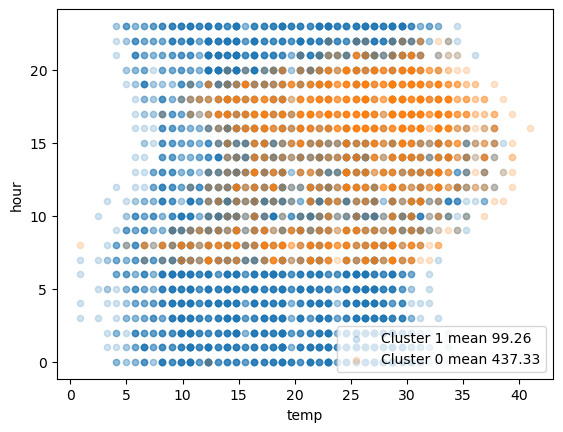

In [85]:
def showClusters(xlabel, ylabel, showLegend=False, sizeDependingOnLabel=None):
    clusters = bikes_enc['cluster'].unique()

    for cluster in clusters:
        CLUSTER_0_MEAN_COUNT = 437.33
        CLUSTER_1_MEAN_COUNT = 99.26

        name_count = {
            0: CLUSTER_0_MEAN_COUNT,
            1: CLUSTER_1_MEAN_COUNT
        }

        temp = bikes_enc[bikes_enc['cluster'] == cluster][xlabel]
        count = bikes_enc[bikes_enc['cluster'] == cluster][ylabel]
        size = 20 if sizeDependingOnLabel is None else bikes_enc[bikes_enc['cluster'] == cluster][sizeDependingOnLabel]
        plt.scatter(temp, count, label=f'Cluster {cluster} mean {name_count[cluster]}', alpha=0.2, s=size)

    plt.legend()
    if showLegend:
        plt.xlabel(xlabel)
        plt.ylabel(ylabel)
    plt.show()

showClusters('temp', 'hour', True)



In [86]:
# 6. (1 point) How many different rental periods are represented in each cluster?

bikes_enc.groupby('cluster')['hour'].head()

0     23
1      8
2      2
3     20
4     17
5     19
6     23
10    15
11    19
12    22
Name: hour, dtype: int64

In [87]:

bikes_enc.groupby('cluster')['hour'].nunique()

cluster
0    17
1    24
Name: hour, dtype: int64

In [88]:
"""
7. (4 points) Using averaged columns within each cluster, give a profile of a low-count rental period and
a high-count rental period. Why do you think fewer people are renting bikes in the low-count rental
period?
1https://www.kaggle.com/datasets/aguado/bike-rental-data-set-uci
"""

bikes_enc.groupby('cluster').mean()



,year,hour,workingday,temp,atemp,humidity,windspeed,count,season_autumn,season_spring,season_summer,season_winter,weather_bad,weather_good,weather_moderate,holiday_no,holiday_yes
cluster,,,,,,,,,,,,,,,,,
0,2011.675573,14.530057,0.661737,24.699761,28.459375,53.791508,13.743007,437.332061,0.252863,0.305821,0.349237,0.092080,0.033397,0.732347,0.234256,0.970420,0.029580
1,2011.428035,10.454318,0.683175,18.605922,21.911704,64.762024,12.449449,99.262650,0.249419,0.228679,0.216521,0.305382,0.092258,0.641337,0.266404,0.971214,0.028786


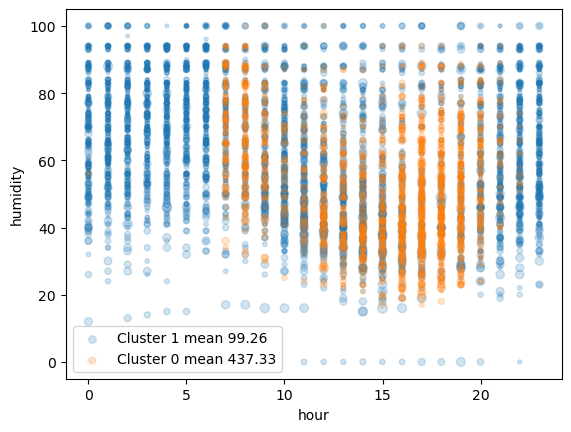

In [92]:
# Hour and count?

showClusters('hour', 'humidity', True, 'windspeed')

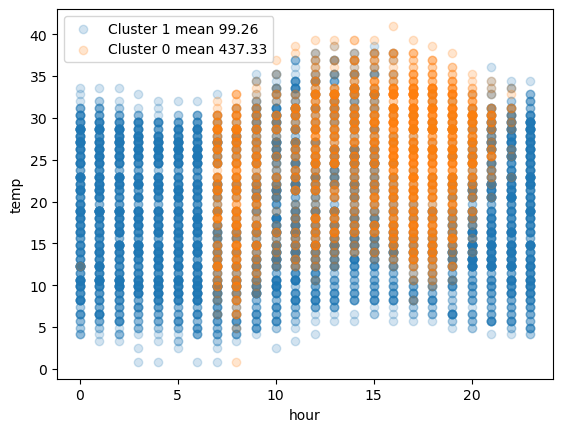

In [79]:
# Season winter.

showClusters('hour', 'temp', True)

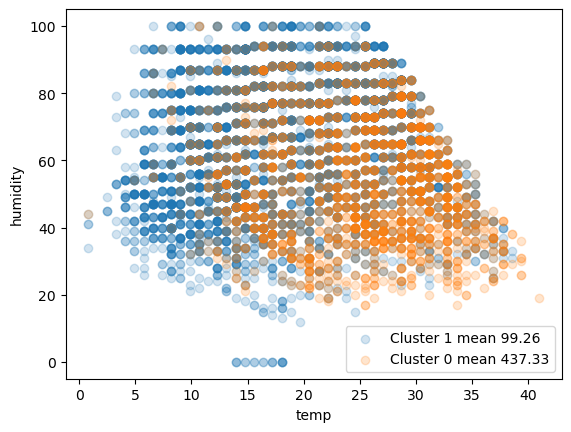

In [81]:
# Season winter.

showClusters('temp', 'humidity', True)

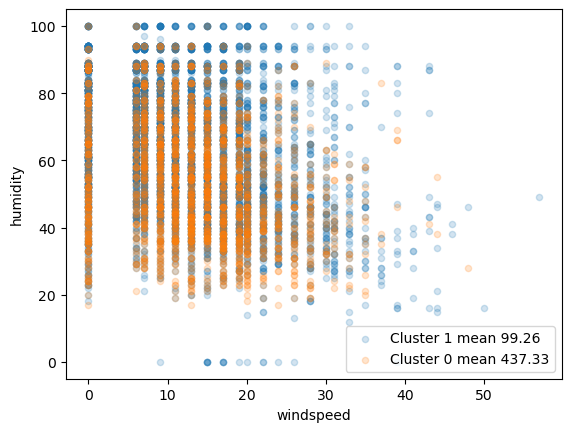

In [91]:
# Season winter.

showClusters('windspeed', 'humidity', True)

In [93]:
# Contrasting 
# 
# - temp
# - humidity
# - aTemp
# - windspeed
# - hour



In [95]:

# 1. Create a new DataFrame with the same index as the original dataset, but with a single column that contains the cluster label for each row.
kmeans = KMeans(n_clusters=3).fit(bikes_enc)
bikes_enc['cluster'] = kmeans.labels_
bikes_enc.head()

,year,hour,workingday,temp,atemp,humidity,windspeed,count,season_autumn,season_spring,season_summer,season_winter,weather_bad,weather_good,weather_moderate,holiday_no,holiday_yes,cluster
0,2012,23,0,23.78,27.275,73,11.0014,133,0,0,1,0,0,0,1,1,0,1
1,2011,8,0,27.88,31.820,57,0.0000,132,0,0,1,0,0,1,0,1,0,1
2,2012,2,1,20.50,24.240,59,0.0000,19,0,0,0,1,0,1,0,1,0,1
3,2011,20,1,25.42,28.790,83,19.9995,58,0,0,1,0,1,0,0,1,0,1
4,2011,17,1,26.24,28.790,89,0.0000,285,0,0,1,0,1,0,0,1,0,2


In [97]:
# Rental Periods.

bikes_enc.groupby('cluster')['hour'].nunique()

cluster
0    14
1    24
2    20
Name: hour, dtype: int64

In [98]:
# Check means.

bikes_enc.groupby('cluster').mean()

,year,hour,workingday,temp,atemp,humidity,windspeed,count,season_autumn,season_spring,season_summer,season_winter,weather_bad,weather_good,weather_moderate,holiday_no,holiday_yes
cluster,,,,,,,,,,,,,,,,,
0,2011.783669,14.794274,0.673383,25.676522,29.474841,52.091198,14.225002,566.600212,0.231177,0.325557,0.366914,0.076352,0.028632,0.766702,0.204666,0.972428,0.027572
1,2011.400583,8.979364,0.661811,17.489153,20.676526,67.343044,12.068318,59.625637,0.236465,0.217286,0.201020,0.345229,0.107793,0.622967,0.269240,0.969896,0.030104
2,2011.540921,14.460982,0.703083,22.680944,26.357680,56.510468,13.441771,263.388656,0.279026,0.273316,0.292729,0.154930,0.043776,0.697754,0.258470,0.972212,0.027788


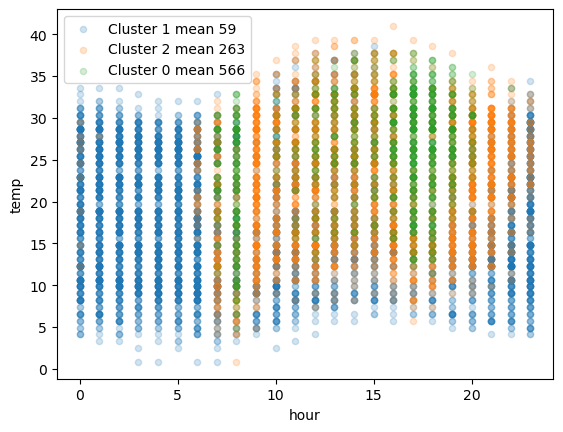

In [101]:
# Plot 
def showClusters(xlabel, ylabel, showLegend=False, sizeDependingOnLabel=None):
    clusters = bikes_enc['cluster'].unique()

    for cluster in clusters:
        CLUSTER_0_MEAN_COUNT = 566
        CLUSTER_1_MEAN_COUNT = 59
        CLUSTER_2_MEAN_COUNT = 263

        name_count = {
            0: CLUSTER_0_MEAN_COUNT,
            1: CLUSTER_1_MEAN_COUNT,
            2: CLUSTER_2_MEAN_COUNT
        }

        temp = bikes_enc[bikes_enc['cluster'] == cluster][xlabel]
        count = bikes_enc[bikes_enc['cluster'] == cluster][ylabel]
        size = 20 if sizeDependingOnLabel is None else bikes_enc[bikes_enc['cluster'] == cluster][sizeDependingOnLabel]
        plt.scatter(temp, count, label=f'Cluster {cluster} mean {name_count[cluster]}', alpha=0.2, s=size)

    plt.legend()
    if showLegend:
        plt.xlabel(xlabel)
        plt.ylabel(ylabel)
    plt.show()

showClusters('hour', 'temp', True)



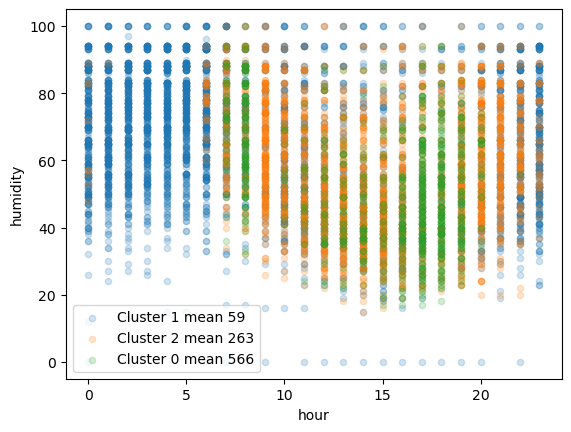

In [103]:
showClusters('hour', 'humidity', True)

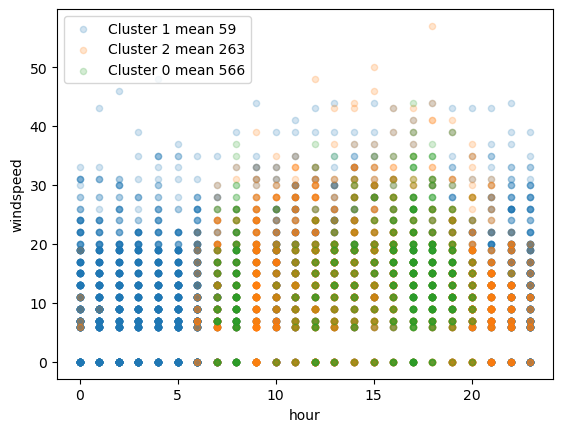

In [112]:
showClusters('hour', 'windspeed', True)

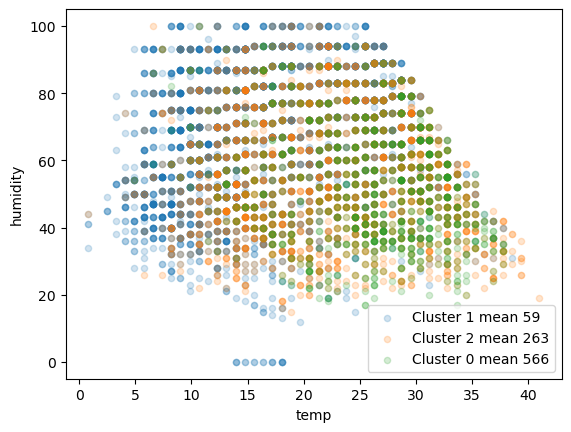

In [108]:
showClusters('temp', 'humidity', True)

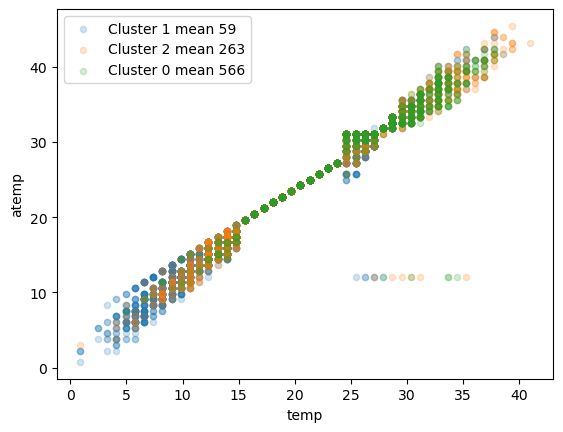

In [110]:
showClusters('temp', 'atemp', True)

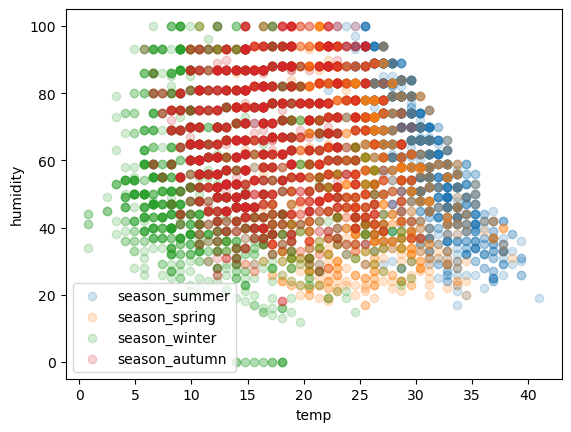

In [118]:
# Plot 
def showClustersByWeather(xlabel, ylabel, showLegend=False):
    SEASONS = ['season_summer', 'season_spring', 'season_winter', 'season_autumn']
    weather_clusters = SEASONS

    for season in weather_clusters:

        data_A = bikes_enc[bikes_enc[season] == 1][xlabel]
        data_B = bikes_enc[bikes_enc[season] == 1][ylabel]
        plt.scatter(data_A, data_B, label=f'{season}', alpha=0.2)

    plt.legend()
    if showLegend:
        plt.xlabel(xlabel)
        plt.ylabel(ylabel)
    plt.show()

showClustersByWeather('temp', 'humidity', True)



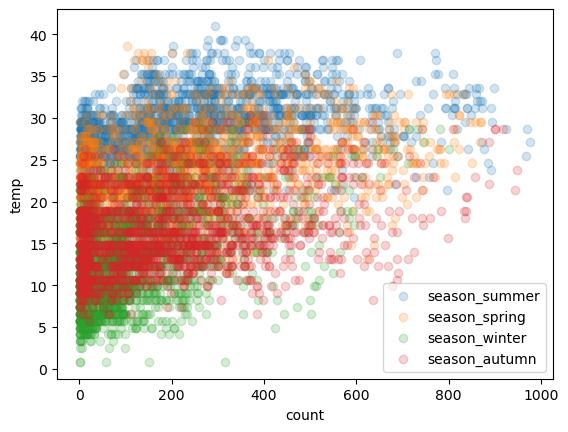

In [119]:

showClustersByWeather('count', 'temp', True)

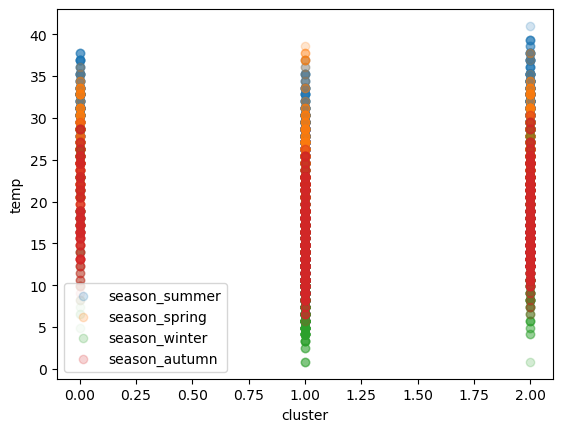

In [120]:

showClustersByWeather('cluster', 'temp', True)